In [1]:
import os
import numpy as np
import pandas as pd
from random import randint,seed
from tqdm import tqdm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [2]:
df1 = pd.read_csv('data_conv/conv1.csv')
df1['freq'] = 1200
print (df1.shape)
df2 = pd.read_csv('data_conv/conv2.csv')
df2['freq'] = 800
print (df2.shape)
df3 = pd.read_csv('data_conv/conv3.csv')
df3['freq'] = 600
print (df3.shape)
df4 = pd.read_csv('data_conv/conv4.csv')
df4['freq'] = 1000
print (df4.shape)

(475000, 9)
(220400, 9)
(159400, 9)
(399600, 9)


In [3]:
df = pd.concat([df1, df2,df3,df4], ignore_index=True)

In [4]:
df.head()

,Unnamed: 0,input_size_h,input_size_w,channels,filter_count,filter_size,stride,runtime,freq
0,0,562,20,900,85,4,2,3.582578,1200
1,1,33,53,8,3,2,1,0.002315,1200
2,2,33,53,13,20,10,1,0.075039,1200
3,3,13,33,5,85,8,1,0.008288,1200
4,4,13,53,5,85,10,1,0.014262,1200


In [5]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,input_size_h,input_size_w,channels,filter_count,filter_size,stride,runtime,freq
0,562,20,900,85,4,2,3.582578,1200
1,33,53,8,3,2,1,0.002315,1200
2,33,53,13,20,10,1,0.075039,1200
3,13,33,5,85,8,1,0.008288,1200
4,13,53,5,85,10,1,0.014262,1200


In [6]:
df_ = df.dropna(axis=0)
df_.head()

,input_size_h,input_size_w,channels,filter_count,filter_size,stride,runtime,freq
0,562,20,900,85,4,2,3.582578,1200
1,33,53,8,3,2,1,0.002315,1200
2,33,53,13,20,10,1,0.075039,1200
3,13,33,5,85,8,1,0.008288,1200
4,13,53,5,85,10,1,0.014262,1200


In [7]:
df_.shape

(1247697, 8)

In [8]:
df_['in_size'] = df_.input_size_h*df_.input_size_w

/home/samavatian.1/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
df_.head()

,input_size_h,input_size_w,channels,filter_count,filter_size,stride,runtime,freq,in_size
0,562,20,900,85,4,2,3.582578,1200,11240
1,33,53,8,3,2,1,0.002315,1200,1749
2,33,53,13,20,10,1,0.075039,1200,1749
3,13,33,5,85,8,1,0.008288,1200,429
4,13,53,5,85,10,1,0.014262,1200,689


In [10]:
data = df_[['freq','in_size' ,'channels','filter_count' ,'filter_size' ,'stride']]
data = data
data.head()

,freq,in_size,channels,filter_count,filter_size,stride
0,1200,11240,900,85,4,2
1,1200,1749,8,3,2,1
2,1200,1749,13,20,10,1
3,1200,429,5,85,8,1
4,1200,689,5,85,10,1


In [11]:
data.max(axis=0)

freq              1200
in_size         315844
channels          1441
filter_count      1441
filter_size         10
stride               2
dtype: int64

In [12]:
data.describe()

,freq,in_size,channels,filter_count,filter_size,stride
count,1.247697e+06,1.247697e+06,1.247697e+06,1.247697e+06,1.247697e+06,1.247697e+06
mean,9.896576e+02,2.007905e+04,2.664450e+02,2.738212e+02,5.390605e+00,1.505033e+00
std,2.059989e+02,4.415531e+04,4.016502e+02,4.128720e+02,2.818734e+00,4.999749e-01
min,6.000000e+02,9.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00
25%,8.000000e+02,1.053000e+03,1.300000e+01,1.300000e+01,2.000000e+00,1.000000e+00
50%,1.000000e+03,4.380000e+03,5.300000e+01,5.300000e+01,6.000000e+00,2.000000e+00
75%,1.200000e+03,1.854600e+04,3.510000e+02,3.510000e+02,8.000000e+00,2.000000e+00
max,1.200000e+03,3.158440e+05,1.441000e+03,1.441000e+03,1.000000e+01,2.000000e+00


In [13]:
target = np.log10(df_.runtime*1000)
target.head()

/home/samavatian.1/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


0    3.554196
1    0.364551
2    1.875287
3    0.918450
4    1.154180
Name: runtime, dtype: float64

In [14]:
scaler = StandardScaler() 
scaler.fit(data)  
data = scaler.transform(data)  
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

In [15]:
new_df = pd.DataFrame(X_train)
new_df.describe()

,0,1,2,3,4,5
count,10331.000000,10331.000000,10331.000000,10331.000000,10331.000000,10331.000000
mean,0.009011,0.000379,0.001532,0.002161,0.007480,-0.000097
std,0.999565,1.010367,1.004977,1.001950,1.002905,1.000048
min,-1.553388,-0.460016,-0.662116,-0.659980,-1.199868,-0.993824
25%,-0.656110,-0.435572,-0.637593,-0.635267,-1.199868,-0.993824
50%,0.241169,-0.357675,-0.539497,-0.536414,0.213596,-0.993824
75%,1.138447,-0.025997,0.191313,0.200038,0.920328,1.006214
max,1.138447,6.934839,2.864410,2.893773,1.627060,1.006214


In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
print('accuracy: ',model.score(X_test, y_test)*100)
print (model.coef_)
pred = model.predict(X_test)
print 'nonzero: ',pred.shape[0]-pred[pred<0].shape[0],'/',pred.shape[0]

('accuracy: ', 76.4874003119978)
[-0.10865994  0.08558673  0.02611897  0.36056625  0.53339693 -0.44444945]
nonzero:  1990 / 1990


In [19]:
model = linear_model.Ridge(alpha=.5)
model.fit(X_train, y_train) 
print('accuracy: ',model.score(X_test, y_test)*100)
print (model.coef_)
pred = model.predict(X_test)
print 'nonzero: ',pred.shape[0]-pred[pred<0].shape[0],'/',pred.shape[0]

('accuracy: ', 76.48731182097018)
[-0.10865286  0.08558159  0.02611308  0.36054396  0.53336275 -0.44442081]
nonzero:  1990 / 1990


In [20]:
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)
print('accuracy: ',model.score(X_test, y_test)*100)
print (model.coef_)
pred = model.predict(X_test)
print 'nonzero: ',pred.shape[0]-pred[pred<0].shape[0],'/',pred.shape[0]

('accuracy: ', 70.57868961375921)
[-0.00724175  0.          0.          0.26170775  0.43374895 -0.3404286 ]
nonzero:  1990 / 1990


In [21]:
model = MLPRegressor(hidden_layer_sizes=1024,learning_rate='invscaling',early_stopping=True,max_iter=1000)
model.fit(X_train, y_train)
print('accuracy: ',model.score(X_test, y_test)*100)
pred = model.predict(X_test)
print 'nonzero: ',pred.shape[0]-pred[pred<0].shape[0],'/',pred.shape[0]

('accuracy: ', 94.1757963568967)
nonzero:  1990 / 1990


In [70]:

inp = np.zeros((1000,6))
inp[:,0]=1000
inp[:,2]=1000
inp[:,3]=10
inp[:,4]=4
inp[:,5]=1
for i in range(1,1000):
    inp[i][1]=randint(1,100000);

In [71]:
inp_ = scaler.transform(inp) 

In [72]:
pred = model.predict(inp_)

In [73]:
pred_= np.power(pred,10)

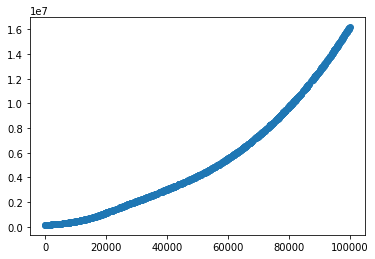

In [74]:
plt.scatter(inp[:,1],pred_)

In [22]:
model = SVR(kernel='rbf', C=1e3, gamma=0.1)
model.fit(X_train, y_train)
print('accuracy: ',model.score(X_test, y_test)*100)
pred = model.predict(X_test)
print 'nonzero: ',pred.shape[0]-pred[pred<0].shape[0],'/',pred.shape[0]

('accuracy: ', 94.46953925201743)
nonzero:  1989 / 1990


In [23]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model = MLPRegressor(hidden_layer_sizes=1024,learning_rate='invscaling',early_stopping=True,max_iter=1000)

In [24]:
scaler.fit(data)  
data_ = scaler.transform(data)
scores = cross_val_score(model, data_, target, cv=cv) 
scores

array([0.83982381, 0.958673  , 0.95112832, 0.96121759, 0.94762112])

In [50]:
bias = np.asarray(model.intercepts_)
arr = np.asarray(model.coefs_)

In [68]:
if os.path.exists("params.txt"):
    os.remove("params.txt")
f=open('params.txt','ab')
print >> f, "L0"+" W"+" "+str(arr[0].shape[0])+" "+str(arr[0].shape[1]) 
np.savetxt(f,arr[0])
print >> f, "L0"+" B"+" "+str(bias[0].shape[0])+" 1"
np.savetxt(f,bias[0])

print >> f, "L1"+" W"+" "+str(arr[1].shape[0])+" "+str(arr[1].shape[1]) 
np.savetxt(f,arr[1])
print >> f, "L1"+" B"+" "+str(bias[1].shape[0])+" 1"
np.savetxt(f,bias[1])
f.close()

In [69]:
print X_test.shape
np.savetxt('input.txt',X_test)

print model.predict(X_test).shape
np.savetxt('output.txt',model.predict(X_test))


(1990, 6)
(1990,)


In [32]:
model = KNeighborsRegressor(n_neighbors=10, weights='distance')
model.fit(X_train, y_train)
print('accuracy: ',model.score(X_test, y_test)*100)
pred = model.predict(X_test)
print 'nonzero: ',pred.shape[0]-pred[pred<0].shape[0],'/',pred.shape[0]

('accuracy: ', 79.16437324660866)
nonzero:  1990 / 1990
